In [1]:
import numpy as np
import matplotlib.pyplot as plt
import common_module as cm

今回はODEを実装する。まずは一階常微分方程式から解くことになる。今回は以下の方程式を解くことになる。
$$\frac{df}{dt} = -y+ 3$$

In [2]:
# 初期値設定
t_0 = 0 
y_0 = 1
dt = 0.01

# 回数
N = 1000

# 初期値代入、履歴保存用の配列
t = t_0
y = y_0
history =np.array([[t_0,y_0]])

#右辺の方程式
def f(t,y):
    return -1*y + 3

In [3]:
#Eular法
def Eular(t,y):
    return y + dt*f(t,y)

In [4]:
for i in range(1,N+1):
   y = Eular(t,y)
   t = t + dt
   history = np.vstack((history,np.array([t,y])))

print(history[:5])


[[0.         1.        ]
 [0.01       1.02      ]
 [0.02       1.0398    ]
 [0.03       1.059402  ]
 [0.04       1.07880798]]


次に解析解を実装する。一般解は今回、簡単に導くことができる。

In [5]:
def analytical_f(t):
    return (y_0 - 3) * np.exp(-1*t) + 3

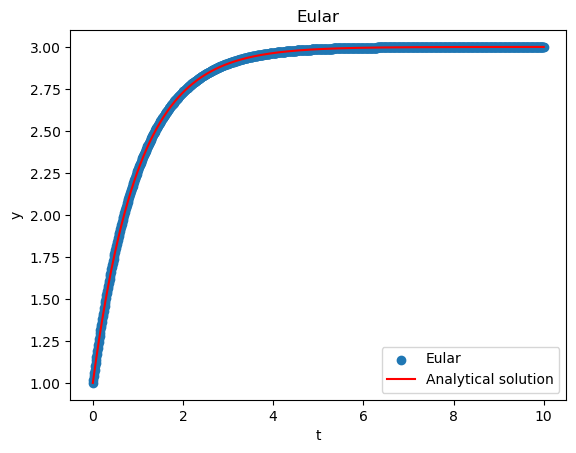

In [6]:
cm.plot_easily(history,"Eular",analytical_f)

次に誤差を判定してみよう。

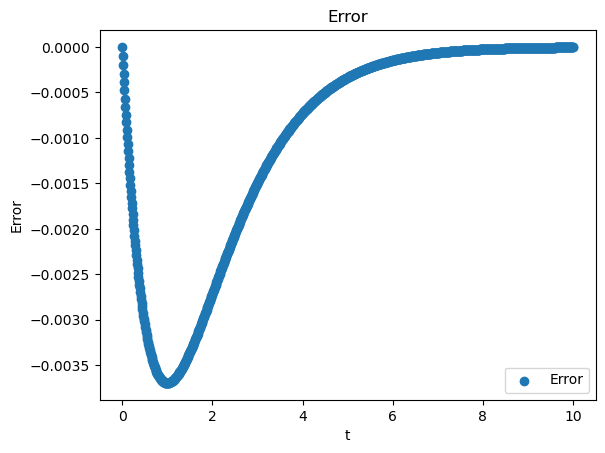

In [8]:
cm.plot_error(history,analytical_f)

なぜ誤差が減っているのかというと、expは急激に減少したあとは緩やかに減っていくような関数系である。そのため、急激に減少したときは２次の項がめちゃくちゃに効いてEular法ではどんどんと誤差が増える分、緩やかなときは２次の項が全然効いていないため、緩やかな減少よりもEular法で近づく速度の方が早くなっているために起こるものである。ちなみにこれは、hを大きく非常に誤差が生まれる。　　　
そして、hを大きくしすぎると、振動解が生まれる。(h=3,N=10で試してみるといい)これは、Eular法が正解の値に近づこうとするが、その時の近づき方が速すぎるために振動してしまうのである。